In [4]:
import pandas as pd
from scipy import integrate
import numpy as np
import scipy.stats as stats
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train (1).csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Transform categorical data into numerical format using suitable methods-->pas nécessaire

In [ ]:
Statistical Analysis with NumPy and SciPy:

In [11]:
df.mean()

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

In [10]:
import scipy.stats as stats


In [ ]:
# for i in df.select_dtypes(include=[np.number]).columns:
    

#     print ("mean is : " , {i}, df[i].mean())
#     print("median is : ",{i} , df[i].median())
#     print("var is : ", {i} , df[i].var())
#     print("standard deviation is : ",{i}  , df[i].std()) 
#     print("next")

"Skewness": skew(df),
        "Kurtosis": kurtosis(df)

In [13]:
from scipy.stats import skew, kurtosis, mode

In [ ]:
# créer une liste pour stocker les résultats stats
stats_list = []
for i in df.select_dtypes(include=[np.number]).columns:

    stats_list.append({

        "features": i,
        "mean " : df[i].mean(),
        "median": df[i].median(),
        "var": df[i].var(),
        "standard deviation": df[i].std(),
        "Skewness": skew(df),
        "Kurtosis": kurtosis(df),
        "Mode": mode(df)[0][0],
        "Range": df.max() - df.min(),

    })
    

In [18]:
stats_df = pd.DataFrame(stats_list)
print(stats_df)

         features       mean   median           var  standard deviation  \
0   battery_power  1238.51850  1226.0  1.930884e+05          439.418206   
1            blue     0.49500     0.0  2.501001e-01            0.500100   
2     clock_speed     1.52225     1.5  6.658629e-01            0.816004   
3        dual_sim     0.50950     1.0  2.500348e-01            0.500035   
4              fc     4.30950     3.0  1.884813e+01            4.341444   
5          four_g     0.52150     1.0  2.496626e-01            0.499662   
6      int_memory    32.04650    32.0  3.292670e+02           18.145715   
7           m_dep     0.50175     0.5  8.318353e-02            0.288416   
8       mobile_wt   140.24900   141.0  1.253136e+03           35.399655   
9         n_cores     4.52050     4.0  5.234197e+00            2.287837   
10             pc     9.91650    10.0  3.677592e+01            6.064315   
11      px_height   645.10800   564.0  1.969414e+05          443.780811   
12       px_width  1251.5

Étudiez les corrélations entre les fonctionnalités et les cibles à l’aide de SciPy.

In [ ]:
# Ensure only numeric columns are used for correlation
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

NameError: name 'battery_power' is not defined

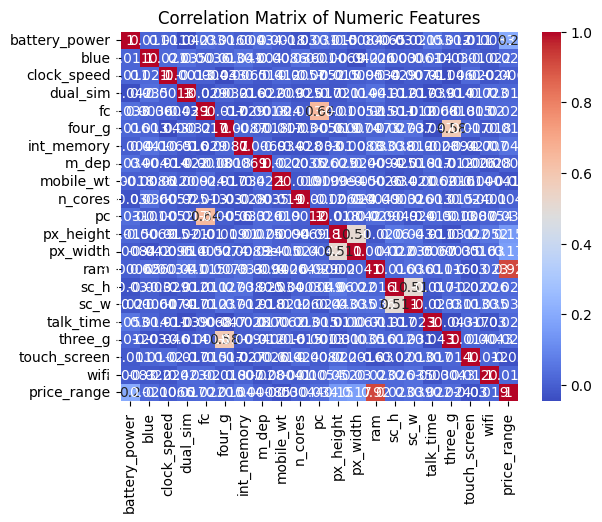

In [21]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()